Introduce Kullback-Leibler diveregnce score:

---

Effectively, it's a measure of how much the probability distributions of two events differ from each other, or how much entropy is gained or lost in changing one probability distributon to the other.


> Suppose, $Q(x)$ and $P(x)$ denote the probabilities of two distributions $Q$ and $P$ on some space $x$. In the context of training loss, $P(x)$ and $Q(x)$ can be thought of as the *true* and *approximate* distributions, respectively. Then the KL divergence score from $Q$ to $P$ is given by
$$D_{KL}(P || Q) = - \sum_{x \in X} P(x) \log\bigg(\frac{Q(x)}{P(x)} \bigg) .$$
Note that $D_{KL}(P||Q) \neq D_{KL}(Q || P)$, so KL divergence does not play the role of metric norm.


---
**Example 0: Let's compute KL divergence between two datasets using Tensorflow Keras loss function package.**

---


*   Import packages



In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

*   Let's try a simple example



In [ ]:
# True distribution P_x and approximate distribution Q_x
P_x = [[-0.4, 1], [3, 0.2]]
Q_x = [[0.16, 0.4], [0.14, 2.1]]
# Let's use 'auto'/'sum_over_batch_size' reduction type
import tensorflow as tf
tf.keras.losses.KLDivergence(reduction="auto", name="kl_divergence")
kl = tf.keras.losses.KLDivergence()
kl(P_x, Q_x).numpy()

1.2802572

In [ ]:
# One can use other reduction types, e.g. 'none' reduction type.
kl = tf.keras.losses.KLDivergence(reduction=tf.keras.losses.Reduction.NONE)
kl(P_x, Q_x).numpy()

array([0.9162893, 1.6442252], dtype=float32)




---


**Example 1: Let's use Tensorflow Keras loss function package based KL diveregnce to train a CNN on CIFAR10 dataset.**


---




*   Import packages



In [ ]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

*   Let's specify model configurations



In [ ]:
img_width, img_height         = 32, 32
batch_size                    = 250
no_epochs                     = 5
no_classes                    = 10
validation_split              = 0.4
verbosity                     = 1

* Load CIFAR10 dataset  

In [ ]:
(i_train, o_train), (i_test, o_test) = cifar10.load_data()

* Reshape data based on channels first / channels last strategy. Ref. https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

In [ ]:
if K.image_data_format() == 'channels_first':
    i_train = i_train.reshape(i_train.shape[0],3, img_width, img_height)
    i_test = i_test.reshape(i_test.shape[0], 3, img_width, img_height)
    i_shape = (3, img_width, img_height)
else:
    i_train = i_train.reshape(i_train.shape[0], img_width, img_height, 3)
    i_test = i_test.reshape(i_test.shape[0], img_width, img_height, 3)
    i_shape = (img_width  , img_height, 3)


* We want all numbers as floats

In [ ]:
i_train = i_train.astype('float32')
i_test = i_test.astype('float32')

* Normalize the data

In [ ]:
i_train = i_train / 255
i_test = i_test / 255

* Convert target vectors to categorical targets

In [ ]:
o_train = keras.utils.to_categorical(o_train, no_classes)
o_test = keras.utils.to_categorical(o_test, no_classes)

* Creat a CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='tanh', input_shape=i_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.40))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.70))
model.add(Flatten())
model.add(Dense(64, activation='exponential'))
model.add(Dense(no_classes, activation='softmax'))

* Next compile the model

In [ ]:
model.compile(loss=keras.losses.kullback_leibler_divergence,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])        # loss = call_any_loss_function, here "call_any_loss_function" can be from Tensorflow loss function packages, or custom loss functions. This can be anything, e.g. quadratic loss, cross entropy loss, or KL divergence.

* Train for 5 epochs (compute time ~12mins)

In [ ]:
model_history = model.fit(i_train, o_train,
      batch_size=batch_size,
      epochs=no_epochs,
      verbose=verbosity,
      validation_data=(i_test, o_test),
      validation_split=validation_split
)



Epoch 1/5
200/200 [==============================] - 92s 456ms/step - loss: 1.7826 - accuracy: 0.3619 - val_loss: 1.4138 - val_accuracy: 0.5009
Epoch 2/5
200/200 [==============================] - 92s 462ms/step - loss: 1.4063 - accuracy: 0.5031 - val_loss: 1.2221 - val_accuracy: 0.5784
Epoch 3/5
200/200 [==============================] - 107s 534ms/step - loss: 1.2754 - accuracy: 0.5519 - val_loss: 1.1605 - val_accuracy: 0.5938
Epoch 4/5
200/200 [==============================] - 93s 463ms/step - loss: 1.1958 - accuracy: 0.5801 - val_loss: 1.0636 - val_accuracy: 0.6284
Epoch 5/5
200/200 [==============================] - 91s 457ms/step - loss: 1.1471 - accuracy: 0.5975 - val_loss: 1.0288 - val_accuracy: 0.6422


* Plot the loss and accuracy at every epoch, obtained using KL divergence in loss function

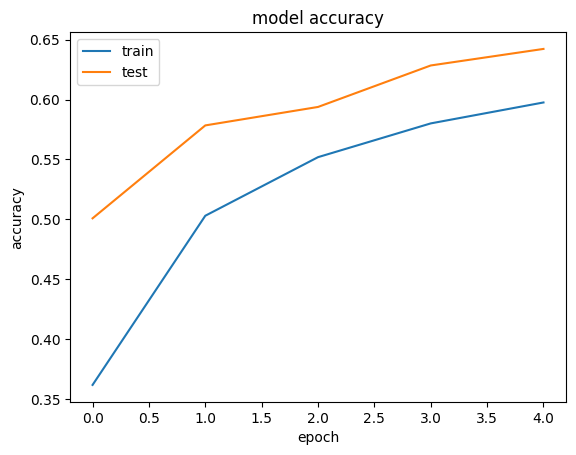

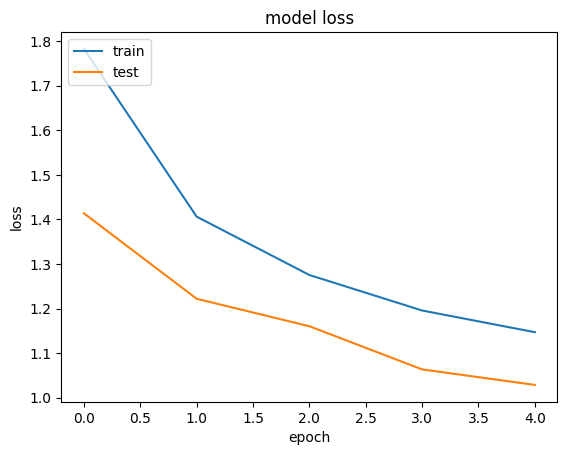

In [ ]:
import matplotlib.pyplot as plt

# plot accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


----
**Problem 1: Rewrite a Tensorflow loss function as KL divergence, from scratch, and use it for optimizing the previous CNN model on CIFAR10 dataset.**

$$Loss = D_{KL}(P || Q) = - \sum_{x \in X} P(x) \log\bigg(\frac{Q(x)}{P(x)} \bigg) .$$

---

*Hint: Write a new loss function following the formula for KL divergence, and call it in the argument of "loss=___" in model compilation step.*

**Solution to Problem 1 below.**

* Let's first define the custom loss function

In [ ]:
def my_KL_loss_fn(y_true, y_pred):
    return tf.reduce_sum(-tf.math.multiply_no_nan(x=y_true,y=(tf.math.log(y_pred  + 1e-3) - tf.math.log(y_true + 1e-3) )), axis=-1) # an upper cap of 1e-3 is added in argument of log(y_true) to ensure we don't get NANs from log(0)

* Now let's use this custom loss function to compile the previous model

In [ ]:
model.compile(loss=my_KL_loss_fn,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

* Let's train this new model for 5 epochs, as before

In [ ]:
model_history_custom = model.fit(i_train, o_train,
      batch_size=batch_size,
      epochs=no_epochs,
      verbose=verbosity,
      validation_data=(i_test, o_test),
      validation_split=validation_split
)

Epoch 1/5
200/200 [==============================] - 63s 313ms/step - loss: 1.6373 - accuracy: 0.4137 - val_loss: 1.3508 - val_accuracy: 0.5099
Epoch 2/5
200/200 [==============================] - 60s 301ms/step - loss: 1.3470 - accuracy: 0.5242 - val_loss: 1.2200 - val_accuracy: 0.5681
Epoch 3/5
200/200 [==============================] - 59s 296ms/step - loss: 1.2377 - accuracy: 0.5637 - val_loss: 1.0908 - val_accuracy: 0.6239
Epoch 4/5
200/200 [==============================] - 65s 325ms/step - loss: 1.1709 - accuracy: 0.5879 - val_loss: 1.0444 - val_accuracy: 0.6391
Epoch 5/5
200/200 [==============================] - 59s 293ms/step - loss: 1.1193 - accuracy: 0.6049 - val_loss: 1.0094 - val_accuracy: 0.6456


* Let's plot the loss and accuracy

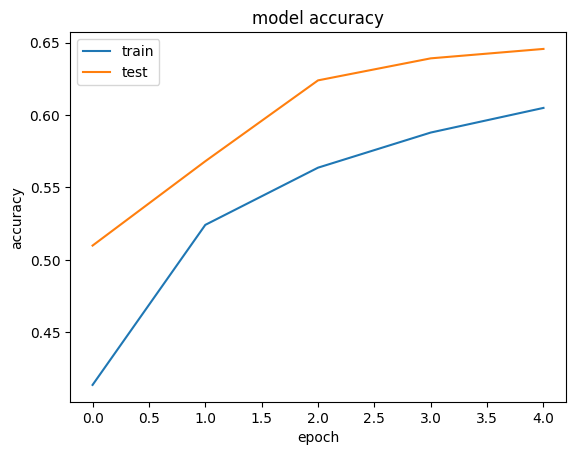

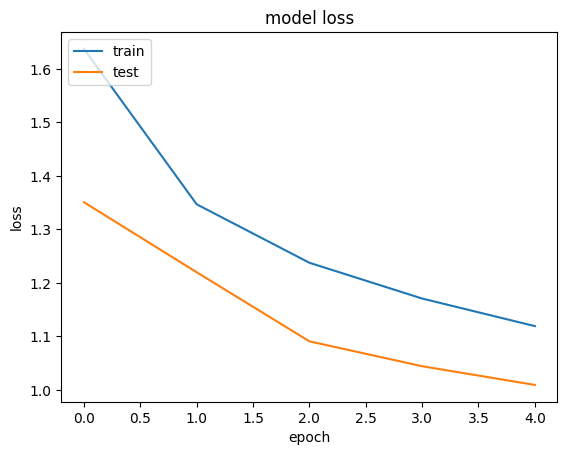

In [ ]:
import matplotlib.pyplot as plt
# plot accuracy
plt.plot(model_history_custom.history['accuracy'])
plt.plot(model_history_custom.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_custom', 'test_custom'], loc='upper left')
plt.show()
# plot loss
plt.plot(model_history_custom.history['loss'])
plt.plot(model_history_custom.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_custom', 'test_custom'], loc='upper left')
plt.show()

---

**Next up: Forward and reverse KL divergences:**

---
In a nut shell, $D_{KL}(P||Q)$ and $D_{KL}(Q||P)$ are respectively known as the forward and reverse KL divergences, for true and approximate distributions $P(x)$ and $Q(x)$.

In the case of forward KL divergence, $P(x) = 0$ does not contribute towards minimizing the KL divergence, and $Q(x)$ is updated to approximate data points $P(x)>0$. As a result, forward KL divergence may not provide the best approximate distribution $Q(x)$ at the end of NN training dynamics.

> Here's an example --
![picture](https://drive.google.com/uc?export=view&id=15HnW-cd2QInRNP5LapvvPlTyGYCq-XiI)
* P(x) is our target distribution. Q(x) here is the initial distribution, given by the NN model output, before we start training.
* Using forward KL divergence, the NN model learns to approximate for any $P(x)>0$, and that approximation is bad in this case. We obtain the following.
![picture](https://drive.google.com/uc?export=view&id=1j-hZ-Co_R_eaECTUJPWmrtts31WjePiB)
* This is not the final distribution we want for $Q(x)$.


On the other hand, the reverse KL divergence $$D_{KL}(Q || P) = - \sum_{x \in X} Q(x) \log\bigg(\frac{P(x)}{Q(x)} \bigg)$$ ensures that $Q(x)=0$ does not contribute to optimization. Thus, $P(x)$ can not be learned starting from $Q(x)=0$; however, whenever $Q(x)>0$, reverse KL divergence contributes to learning both $P(x)=0$ and $P(x)>0$.

Finally, the choice of forward vs. reverse KL divergence as a loss function depends entirely on true and initial approximate distributions $P(x)$, and $Q(x)$.



----
**Problem 2: We already rewrote a Tensorflow loss function in terms of forward KL divergence. Next, let us rewrite the loss function as reverse KL divergence, and use it to optimize our model on CIFAR10 dataset.**

$$Loss = D_{KL}(Q || P) = - \sum_{x \in X} Q(x) \log\bigg(\frac{P(x)}{Q(x)} \bigg) .$$

**Any improvement in learning?**

---


**Solution to Problem 2 below**

Epoch 1/5
200/200 [==============================] - 62s 310ms/step - loss: 1.0807 - accuracy: 0.6204 - val_loss: 0.9739 - val_accuracy: 0.6663
Epoch 2/5
200/200 [==============================] - 59s 296ms/step - loss: 1.0422 - accuracy: 0.6339 - val_loss: 0.9434 - val_accuracy: 0.6753
Epoch 3/5
200/200 [==============================] - 59s 295ms/step - loss: 1.0196 - accuracy: 0.6405 - val_loss: 0.9246 - val_accuracy: 0.6758
Epoch 4/5
200/200 [==============================] - 59s 294ms/step - loss: 0.9953 - accuracy: 0.6488 - val_loss: 0.9441 - val_accuracy: 0.6692
Epoch 5/5
200/200 [==============================] - 59s 295ms/step - loss: 0.9700 - accuracy: 0.6611 - val_loss: 0.8834 - val_accuracy: 0.6934


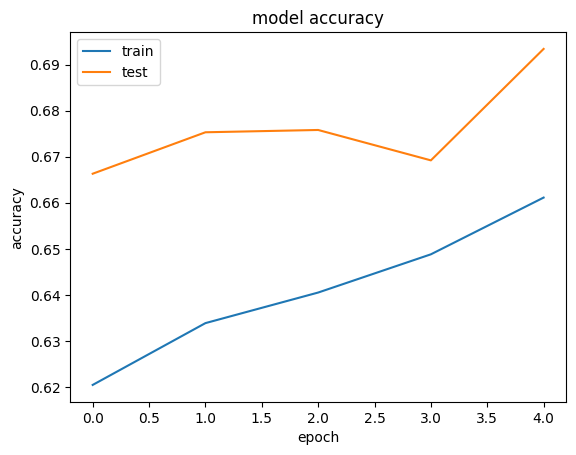

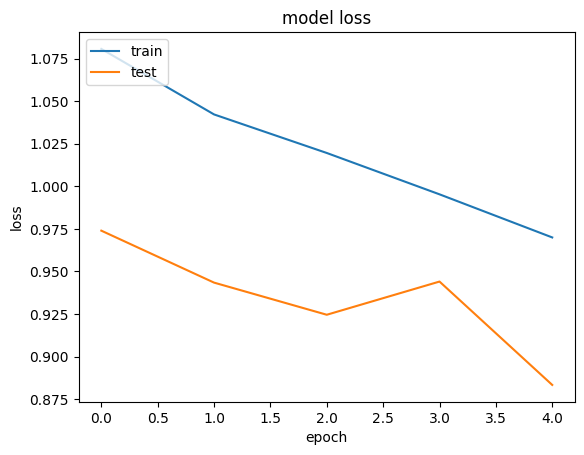

In [ ]:
# redefine the loss function as reverse KL divergence
def my_reverse_KL_loss_fn(y_true, y_pred):
    return tf.reduce_sum(-tf.math.multiply_no_nan(x=y_pred,y=( - tf.math.log(y_pred  + 1e-3) + tf.math.log(y_true + 1e-3) )), axis=-1) # an upper cap of 1e-3 is added in argument of log(y_true) to ensure we don't get NANs from log(0)

# compile the same model with new loss function
model.compile(loss=my_KL_loss_fn,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# train 5 epochs using new loss function
model_history_custom = model.fit(i_train, o_train,
      batch_size=batch_size,
      epochs=no_epochs,
      verbose=verbosity,
      validation_data=(i_test, o_test),
      validation_split=validation_split
)

import matplotlib.pyplot as plt

# plot new accuracy
plt.plot(model_history_custom.history['accuracy'])
plt.plot(model_history_custom.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_custom', 'test_custom'], loc='upper left')
plt.show()
# plot new loss
plt.plot(model_history_custom.history['loss'])
plt.plot(model_history_custom.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test', 'train_custom', 'test_custom'], loc='upper left')
plt.show()